In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


Laad bestanden

In [67]:
#Load files
location = 'Budel'
modelname = 'kort_fullrun'

results = pd.read_csv(rf'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\RMSE_all.csv', names = ['sim', 'RMSE', 'xcorlen', 'zcorlen','frac', 'cc'])
best = xr.open_dataset(rf'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestRealizations.nc')
Residuals = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\Residuals_{modelname}.csv", index_col = "Time")
Performance = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\Calibration_Performance_{modelname}.csv")
BestParamsSS = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestParams_SS_{modelname}.csv", names = ['param', 'value'], header = 0, index_col = 'param' )
BestParamst = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestParams_t_{modelname}.csv", names = ['param', 'value'], header = 0, index_col = 'param' )
ModHeads = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\ModHead_{modelname}.csv", index_col = "Time")
ObsHeads = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\ObsHead_{modelname}.csv", index_col = "Time")
RMSE_ref = Performance['RMSE'][0]
KGE_ref = Performance['KGE'][17]

In [68]:

K_SS = BestParamsSS[~BestParamsSS.index.str.endswith('b')]
K_SS = 2**K_SS
K_T= 2**BestParamst[~BestParamst.index.str.startswith('SS')]
SS = 10**BestParamst[BestParamst.index.str.startswith('SS')]

Params = pd.concat([K_SS * K_T, SS, BestParamsSS[BestParamsSS.index.str.endswith('b')] ])
Params

,value
param,
KIz2,3.635829
KIk2,5.505508
KIz3,0.390847
KIk3,1.669815
KIz4,0.164013
SSz,1.799391
SSk,6.712327
KIz2_ghb,-1.148621
KIz3_ghb,-2.161878


Plot RMSE vs KGE

c:\ProgramData\anaconda3\envs\BW\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'KGE [-]')

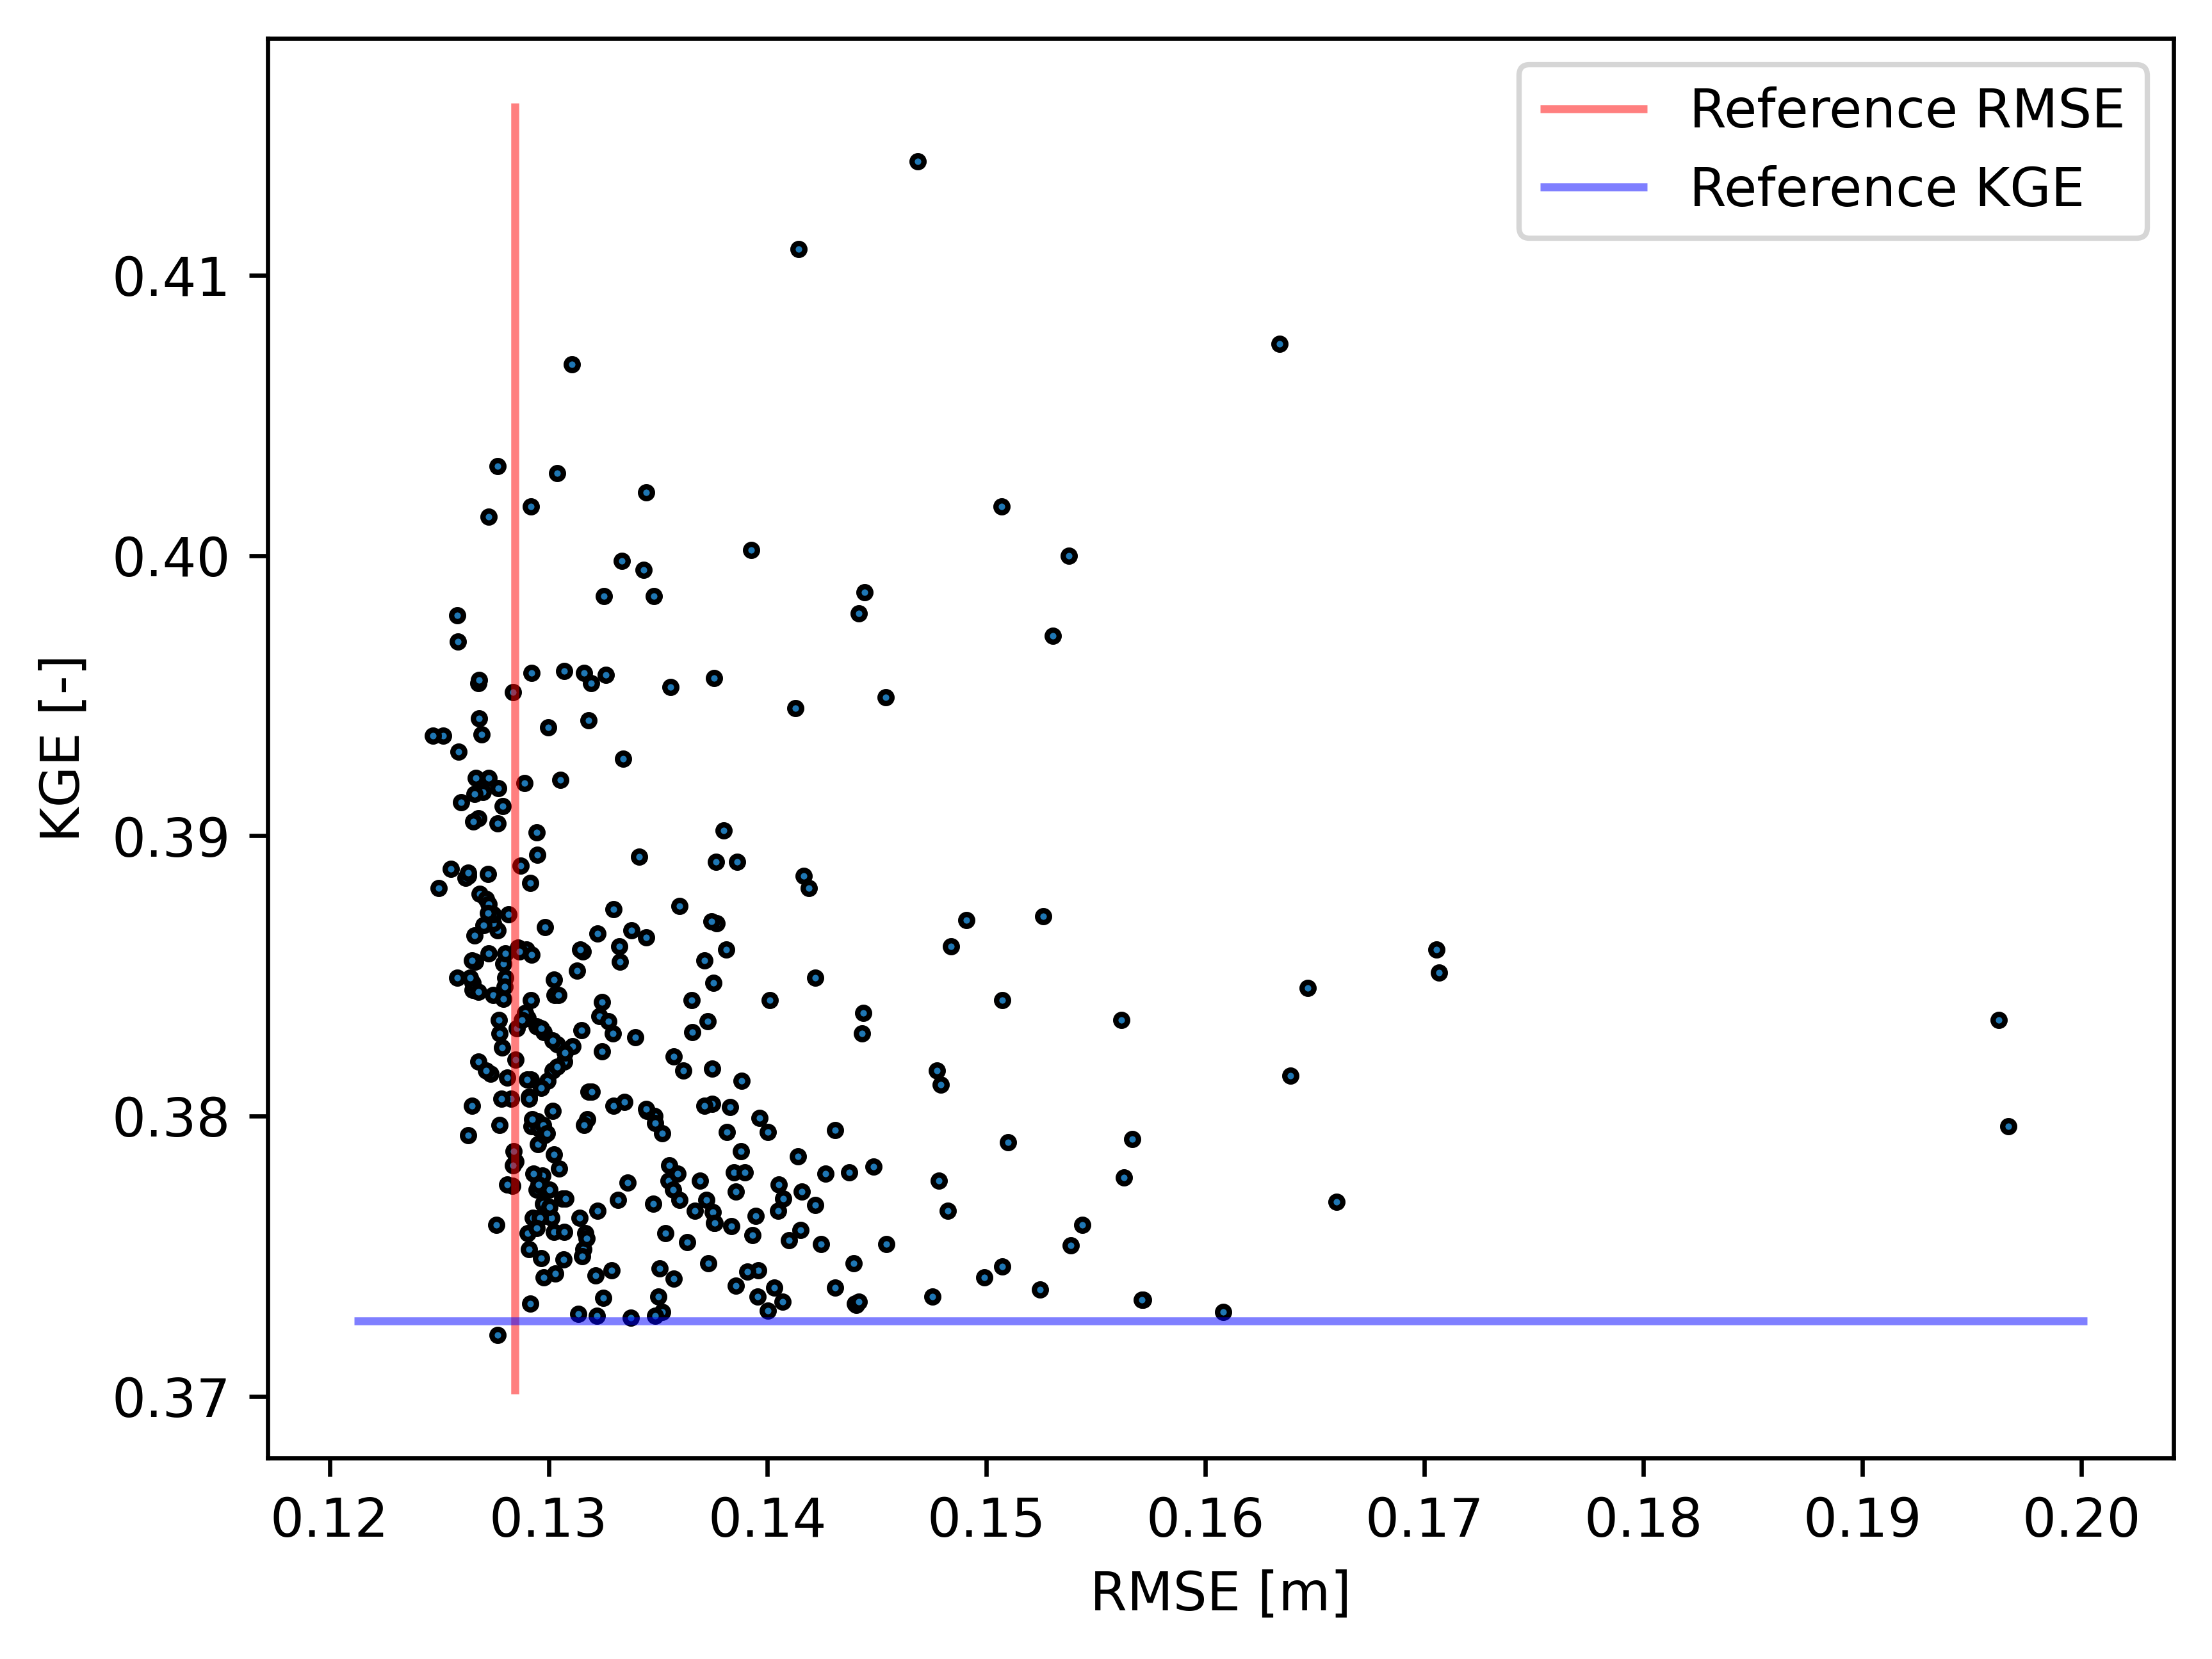

In [69]:

sel = best.sel(icell2d = 0)
resultsBetter = sel.to_dataframe()
fig, ax = plt.subplots()
fig.set_dpi(600)
s = resultsBetter.plot.scatter(x = 'RMSE', y = 'KGE', s = 5,ax = ax, edgecolor = 'black', cmap = 'viridis')
ymin, ymax = s.get_ylim()
xmin,xmax = s.get_xlim()
ax.vlines(RMSE_ref, ymin = ymin, ymax = ymax, zorder =  5, alpha = 0.5, color = 'red', label = 'Reference RMSE')
ax.hlines(KGE_ref, xmin = xmin, xmax = xmax, zorder =  5, alpha = 0.5, color = 'blue', label = 'Reference KGE')
ax.legend()
ax.set_xlabel('RMSE [m]')
ax.set_ylabel('KGE [-]')

Plot correlation lengths vs eachother

(3.0, 17.0)

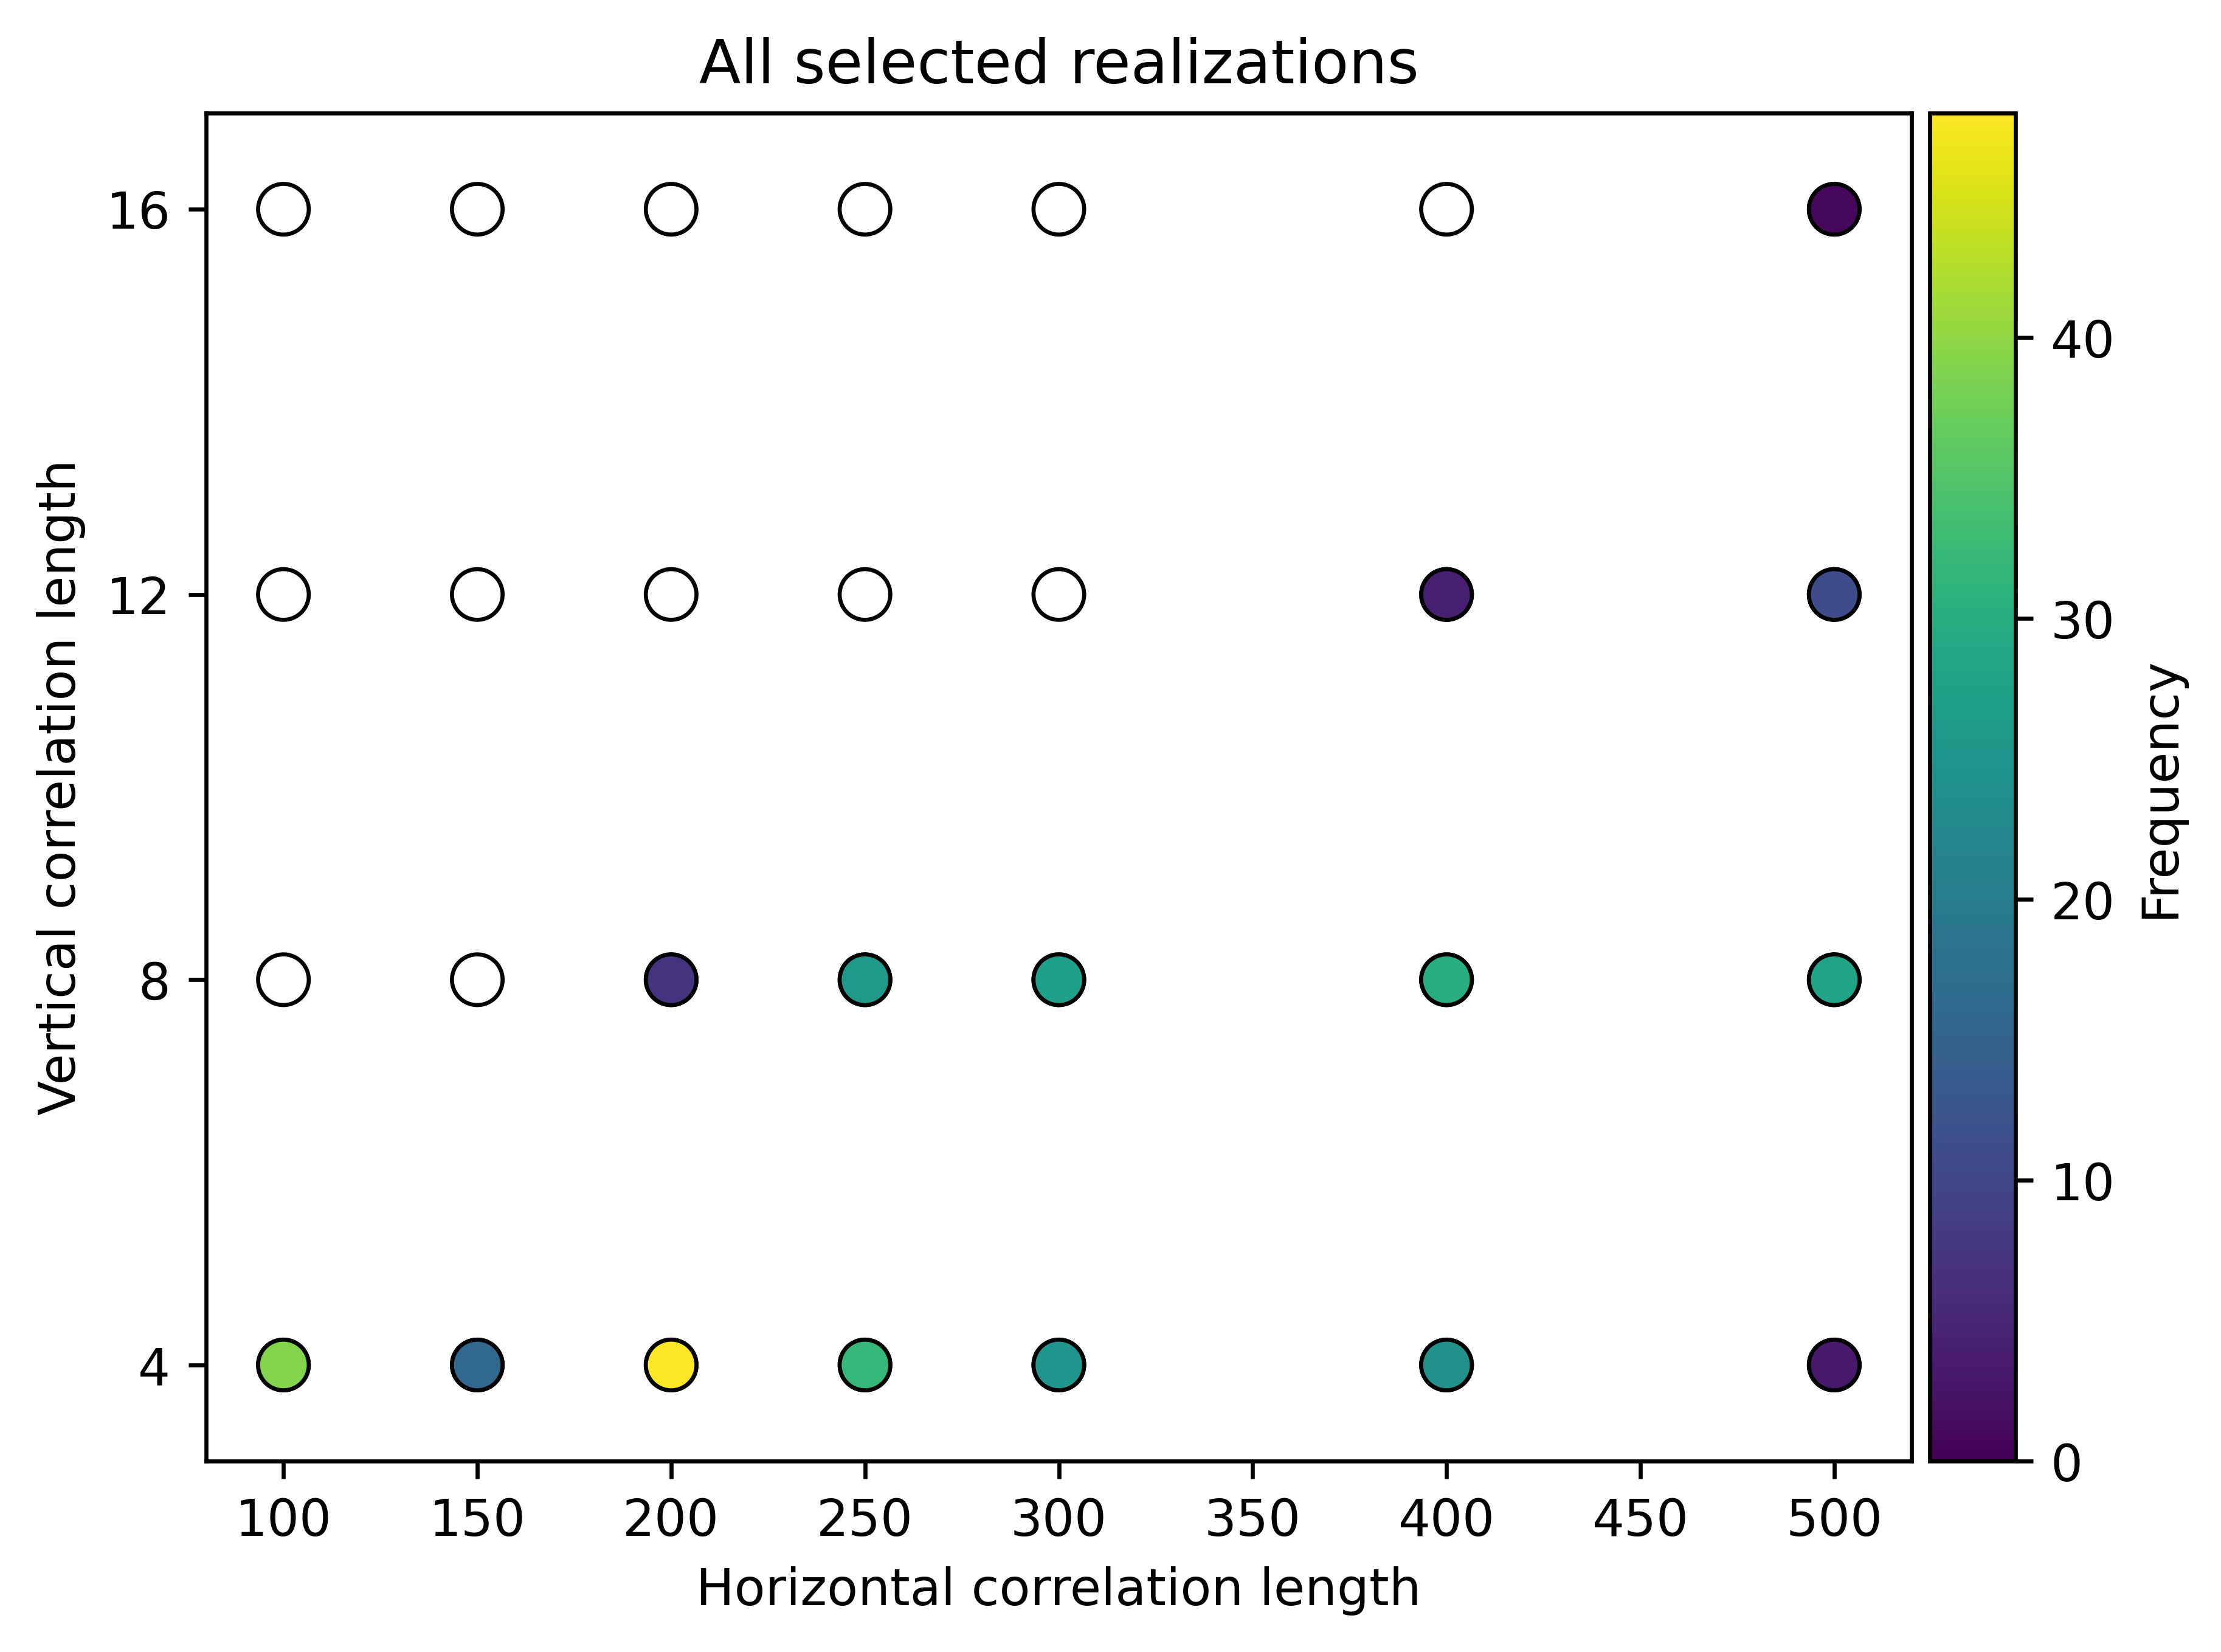

In [70]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
fig, axs = plt.subplots(dpi = 600)
no = 1
fulldf = results[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')
fulldf['count'] = 0

df = resultsBetter[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')

norm = plt.Normalize(0, df['count'].max())
sc = sns.scatterplot(fulldf,x = 'xcorlen', y = 'zcorlen', ax = axs, edgecolor = 'black', facecolors = 'none', s = 100)
sns.scatterplot(df,x = 'xcorlen', y = 'zcorlen', hue = 'count', ax = axs,hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
axs.get_legend().remove()
axs.figure.colorbar(sm, cax = cax, label = 'Frequency')


axs.set_title(f'All selected realizations')
axs.set_xlabel('Horizontal correlation length')
axs.set_ylabel('Vertical correlation length')
axs.set_yticks([4,8,12,16])
axs.set_ylim([3,17])

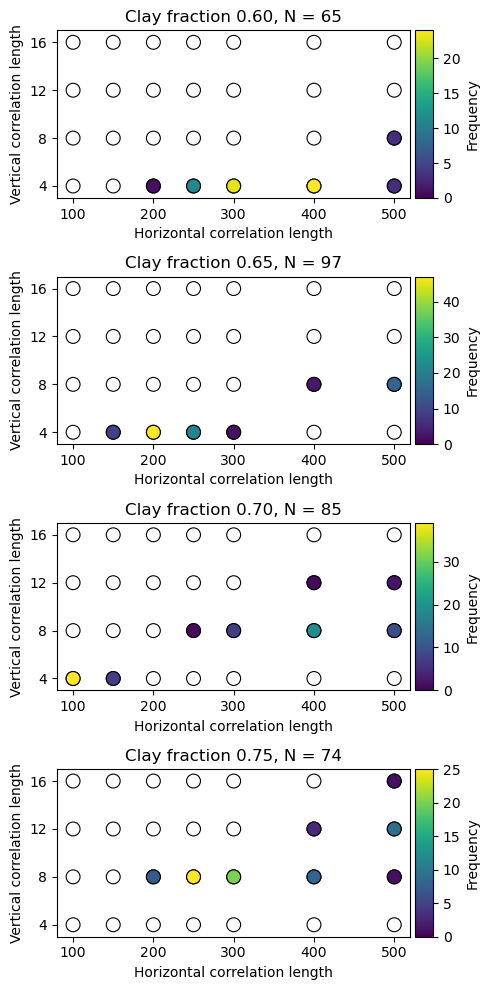

In [184]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(4)
fig.set_size_inches(5,10)

for no,frac in enumerate((np.sort(resultsBetter.frac.unique()))):
    #get counts
    fulldf = results[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')
    fulldf['count'] = 0
    sel = resultsBetter[resultsBetter.frac == frac]
    df = sel[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')

    norm = plt.Normalize(0, df['count'].max())
    sc = sns.scatterplot(fulldf,x = 'xcorlen', y = 'zcorlen', ax = axs[no], edgecolor = 'black', facecolors = 'none', s = 100)
    sns.scatterplot(df,x = 'xcorlen', y = 'zcorlen', hue = 'count', ax = axs[no],hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    divider = make_axes_locatable(axs[no])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    axs[no].get_legend().remove()
    axs[no].figure.colorbar(sm, cax = cax, label = 'Frequency')


    axs[no].set_title(f'Clay fraction {0.60 + frac:.2f}, N = {len(sel)}')
    axs[no].set_xlabel('Horizontal correlation length')
    axs[no].set_ylabel('Vertical correlation length')
    axs[no].set_yticks([4,8,12,16])
    axs[no].set_ylim([3,17])

fig.tight_layout()

In [73]:
# best.frac.min()
def reduce_constant_variables(ds):
    reduced_ds = ds.copy()  # Work on a copy of the dataset
    
    for var in ds.data_vars:
            # Check if the variable has the same value along this dimension
            if var != 'k':
                reduced_ds[var] = reduced_ds[var].mean(dim = 'icell2d')
    
    return reduced_ds
best = reduce_constant_variables(best)


<xarray.Dataset>
Dimensions:  (icell2d: 844, index: 321)
Coordinates:
  * icell2d  (icell2d) int64 0 1 2 3 4 5 6 7 ... 836 837 838 839 840 841 842 843
  * index    (index) int64 3 7 11 19 23 27 35 39 ... 95 135 139 143 171 187 31
Data variables:
    sim      (index) float64 0.0 1.0 2.0 4.0 5.0 6.0 ... 34.0 35.0 42.0 46.0 7.0
    RMSE     (index) float64 0.13 0.1283 0.1285 0.1295 ... 0.1341 0.1442 0.1647
    KGE      (index) float64 0.3813 0.3775 0.382 0.3774 ... 0.3893 0.3979 0.3846
    alpha    (index) float64 0.8364 0.8399 0.8366 ... 0.8435 0.8299 0.8188
    beta     (index) float64 0.8361 0.8389 0.8404 ... 0.8191 0.8053 0.7699
    r        (index) float64 0.8194 0.8192 0.8193 ... 0.8131 0.8154 0.8136
    xcorlen  (index) float64 100.0 100.0 100.0 100.0 ... 500.0 500.0 500.0 500.0
    zcorlen  (index) float64 4.0 4.0 4.0 4.0 4.0 ... 12.0 12.0 12.0 12.0 16.0
    frac     (index) float64 0.1 0.1 0.1 0.1 0.1 ... 0.15 0.15 0.15 0.15 0.15
    cc       (index) float64 1.5 1.5 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5 1.5 1.5
    k        (index, icell2d) float64 ...

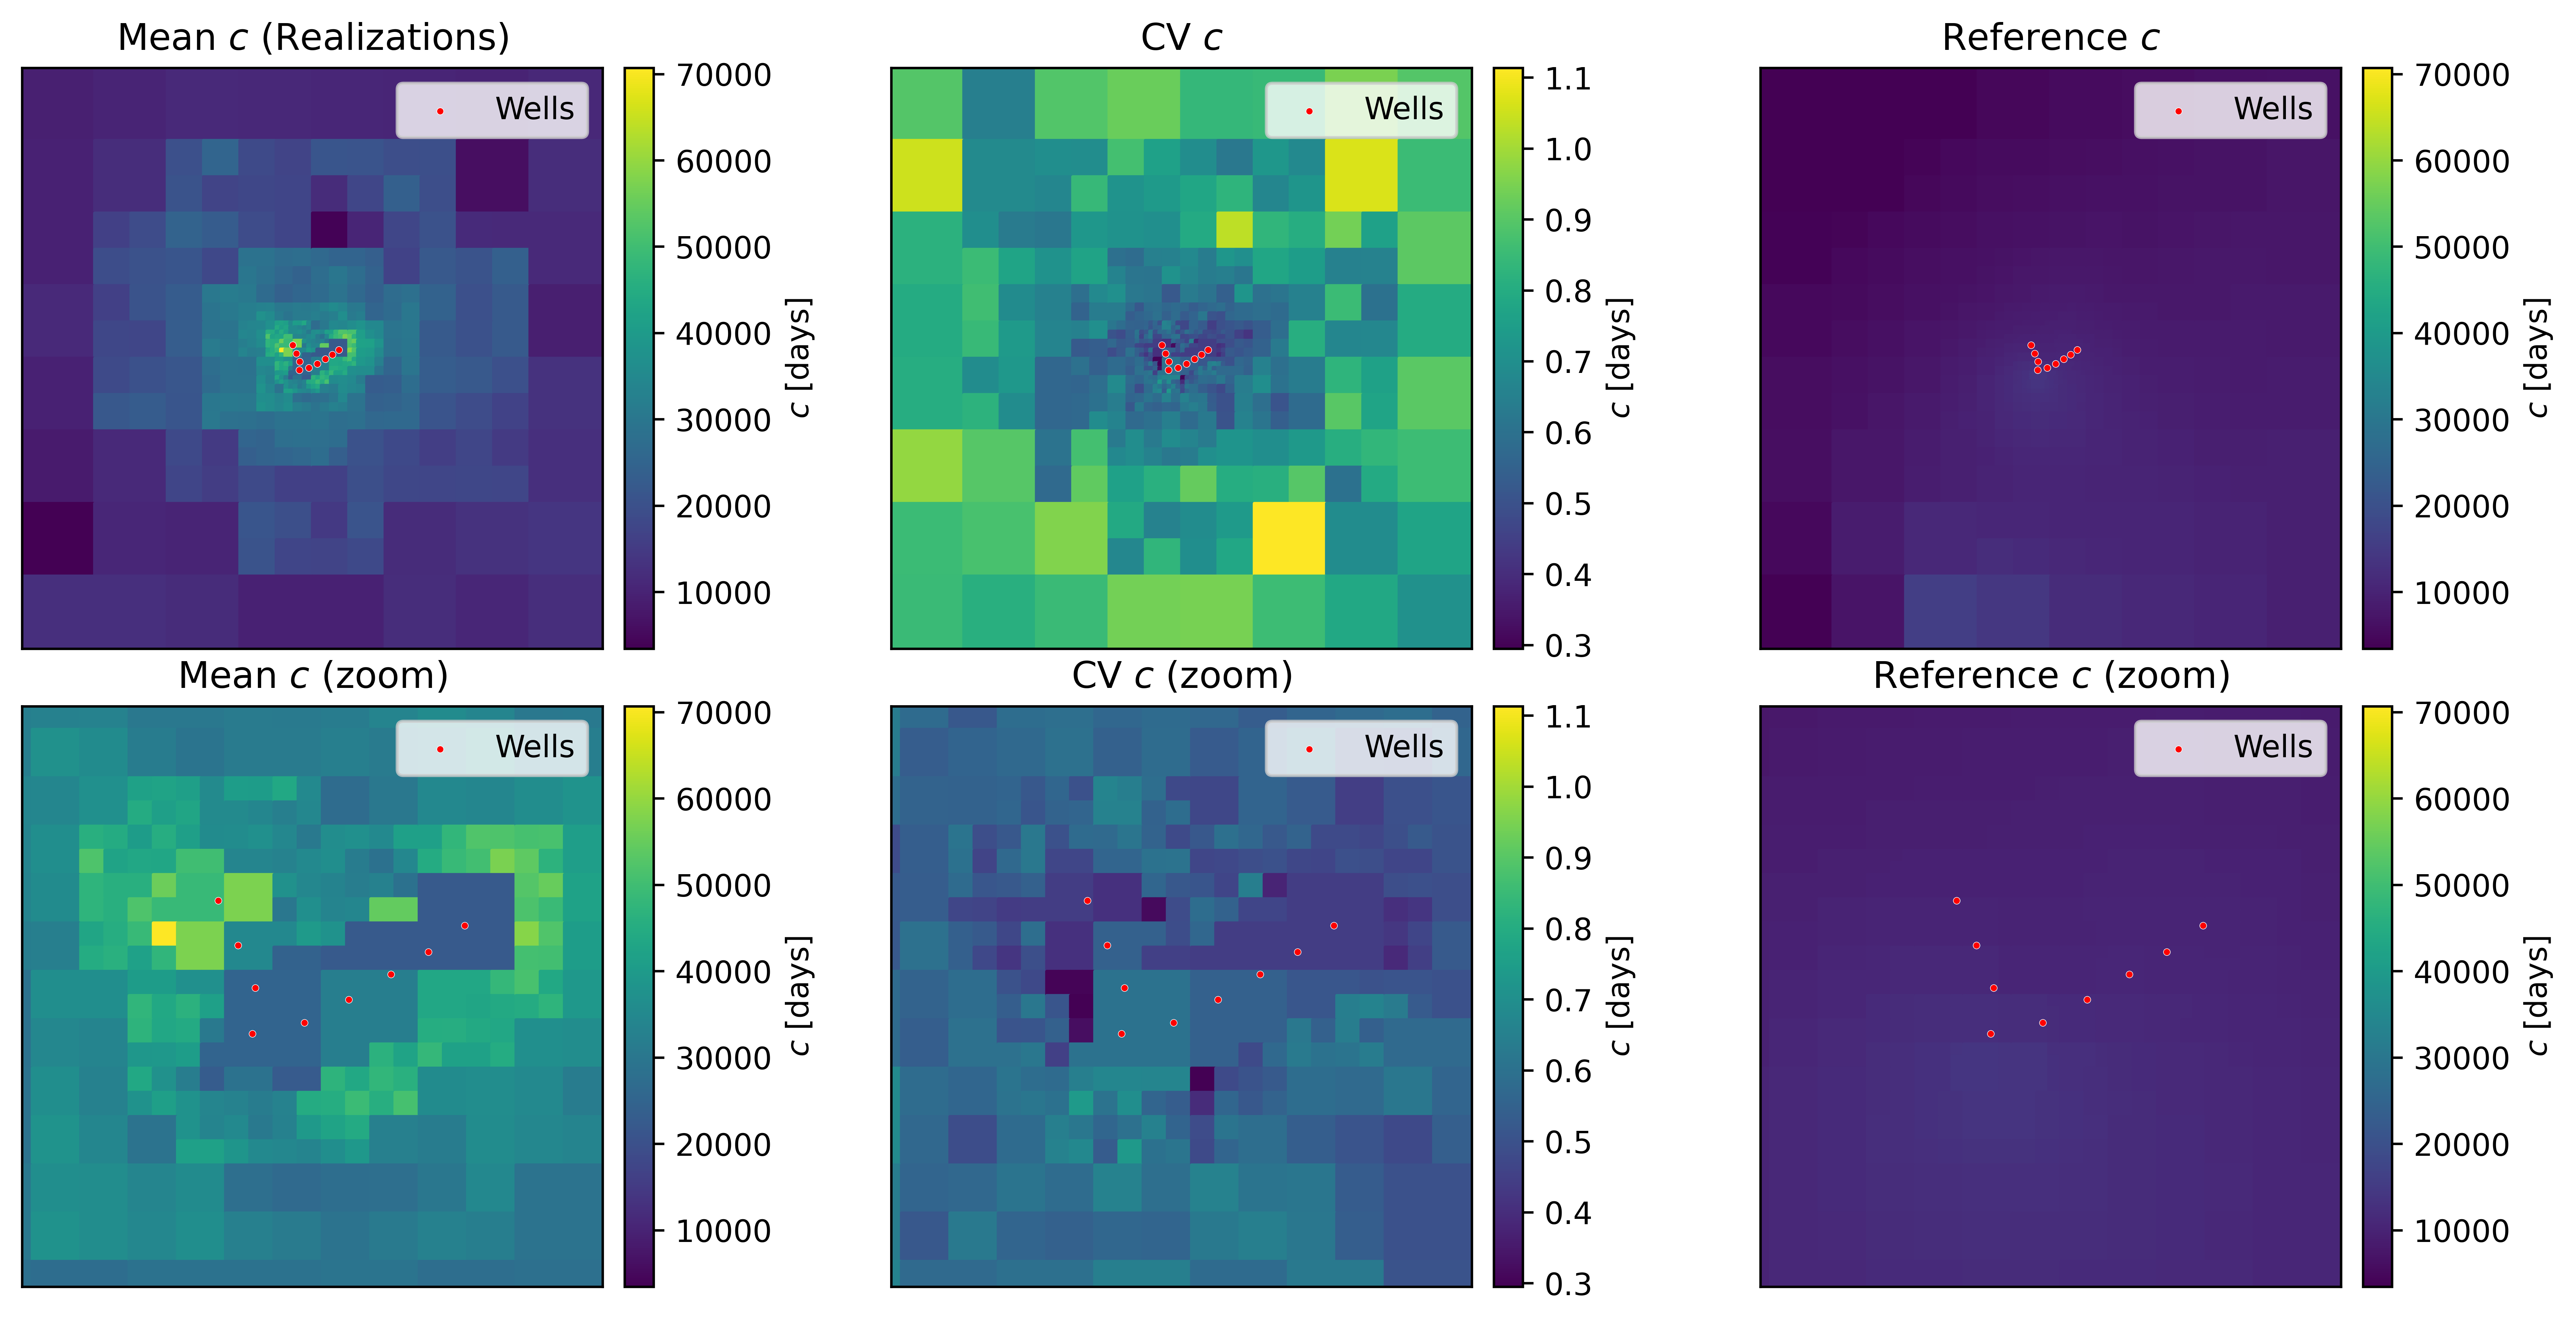

In [ ]:
import nlmod
import xarray as xr
import os 

fig, axs = plt.subplots(2,3, dpi = 600)
fig.set_size_inches(12,6)
ds = xr.open_dataset(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\kort_fullrun\kort_fullrun_ss\kort_fullrun_ss.nc")
ExWells = pd.read_csv(os.path.join('..','Data','dawaco',f'winputten_WG_Budel.csv'))
# nlmod.plot.modelgrid(ds, linewidth = 1, alpha = 0.5)
# nlmod.plot.data_array(ds.sel(layer = 'KIk2').kv, ds = ds)
ds['meanbestKV'] = best.k.mean(dim='index')

ds['stdbestKV'] = best.k.std(dim='index')/best.k.mean(dim = 'index')
d =  -(ds.isel(layer = list(ds.layer).index('KIk2')).botm - ds.isel(layer = list(ds.layer).index('KIk2') -1).botm)
c = d/(ds.sel(layer = 'KIk2').kv * Params.loc['KIk2'].values)
nlmod.plot.map_array(ds.meanbestKV, ds = ds, ax = axs[0,0], colorbar = True, colorbar_label = '$c$ [days]', title = 'Mean $c$ (Realizations)', plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)
nlmod.plot.map_array(ds.stdbestKV, ds = ds, ax = axs[0,1], colorbar = True, colorbar_label = '$c$ [days]',title = 'CV $c$', plot_grid = False, vmin = ds.stdbestKV.min().values, vmax = ds.stdbestKV.max().values)
nlmod.plot.map_array(ds.meanbestKV, ds = ds, ax = axs[1,0], colorbar = True, colorbar_label = '$c$ [days]', title = 'Mean $c$ (zoom)', plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)
nlmod.plot.map_array(ds.stdbestKV, ds = ds, ax = axs[1,1], colorbar = True, colorbar_label = '$c$ [days]',title = 'CV $c$ (zoom)', plot_grid = False, vmin = ds.stdbestKV.min().values, vmax = ds.stdbestKV.max().values)
nlmod.plot.map_array(c, ds = ds, ax = axs[0,2], colorbar = True, colorbar_label = '$c$ [days]', title = 'Kv', plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)
nlmod.plot.map_array(c, ds = ds, ax = axs[1,2], colorbar = True, colorbar_label = '$c$ [days]', title = 'Kv', plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)
for x in [0,1]:
    for y in [0,1,2]:
        sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[x,y], c = 'red', s = 5, label = 'Wells')
        axs[x,y].set_xticks([])
        axs[x,y].set_yticks([])
        axs[x,y].set_ylabel('')
        axs[x,y].set_xlabel('')
        axs[x,y].set_aspect('equal')
        axs[1,y].set_xlim([168300, 169500])
        axs[1,y].set_ylim([366100, 367300])
axs[0,2].set_title("Reference $c$")
axs[1,2].set_title("Reference $c$ (zoom)")




fig.tight_layout()



In [80]:
best.RMSE

<xarray.DataArray 'RMSE' (index: 321)>
array([0.12995939, 0.12834548, 0.12848393, 0.12946642, 0.12678339,
       0.13109608, 0.13026231, 0.13026751, 0.1294357 , 0.12948225,
       0.12810509, 0.13038102, 0.12653171, 0.1266108 , 0.13011657,
       0.1316054 , 0.1278653 , 0.12951152, 0.12854144, 0.13005413,
       0.13177585, 0.12774167, 0.12921943, 0.12663613, 0.12971962,
       0.13029953, 0.13250515, 0.12651001, 0.12955126, 0.12918251,
       0.12747347, 0.12735692, 0.13182947, 0.1282964 , 0.13072407,
       0.12911784, 0.12955099, 0.12766483, 0.1307051 , 0.13768463,
       0.13755697, 0.14393541, 0.13747083, 0.13957188, 0.14266138,
       0.13691213, 0.13667946, 0.13748011, 0.14000836, 0.13484678,
       0.13855709, 0.14098007, 0.1383417 , 0.13506191, 0.14151583,
       0.14754347, 0.12767492, 0.12794425, 0.1293249 , 0.12818438,
       0.12652391, 0.12747549, 0.12714989, 0.13061664, 0.13224695,
       0.13025681, 0.125893  , 0.12872405, 0.13244145, 0.13019979,
       0.12793679, 0.12909494, 0.13245324, 0.13501907, 0.12904126,
       0.13517646, 0.13077226, 0.1291716 , 0.12769014, 0.1286211 ,
       0.13045994, 0.12641379, 0.12848306, 0.12966122, 0.12701886,
       0.12919164, 0.12977877, 0.12902394, 0.12679159, 0.13519156,
       0.13161887, 0.12916089, 0.12840803, 0.13167626, 0.12599276,
       0.12910681, 0.13017756, 0.12904275, 0.12812042, 0.12777026,
...
       0.13757981, 0.13946668, 0.14418057, 0.13272066, 0.1424426 ,
       0.13632735, 0.1405106 , 0.13130932, 0.13175004, 0.12878644,
       0.1294602 , 0.13570698, 0.13317798, 0.1347907 , 0.14309466,
       0.13615904, 0.12966388, 0.13213764, 0.13135483, 0.13557408,
       0.15258995, 0.13925585, 0.14772775, 0.14126368, 0.13149494,
       0.13729711, 0.13799232, 0.15072351, 0.13765941, 0.12983407,
       0.12766247, 0.12948156, 0.15664919, 0.14790905, 0.13038911,
       0.12726861, 0.13326997, 0.13710979, 0.13162164, 0.1286629 ,
       0.15072296, 0.13861284, 0.12918685, 0.12925831, 0.13379967,
       0.13053351, 0.1247327 , 0.13894892, 0.12802679, 0.19666112,
       0.16338492, 0.14685508, 0.12992916, 0.12838581, 0.13953681,
       0.1371332 , 0.13340976, 0.13726981, 0.17067675, 0.15068777,
       0.14539641, 0.15099268, 0.13828921, 0.13447127, 0.13145125,
       0.14435931, 0.12921117, 0.12554429, 0.14837923, 0.13434857,
       0.13183313, 0.13654983, 0.12838101, 0.15626467, 0.13222236,
       0.13447173, 0.14002622, 0.13534595, 0.12683416, 0.14542253,
       0.14140092, 0.13881305, 0.15437385, 0.14157956, 0.19623046,
       0.17055843, 0.14010578, 0.14143193, 0.15375911, 0.15615514,
       0.13853889, 0.13106292, 0.16389186, 0.13412436, 0.14416432,
       0.16466901])
Coordinates:
  * index    (index) int64 3 7 11 19 23 27 35 39 ... 95 135 139 143 171 187 31

In [180]:
import nlmod
import xarray as xr
import os 
import matplotlib as mpl
num = 5
fig, axs = plt.subplots(2,num, dpi = 1200)
fig.set_size_inches(num*3,6)

best = best.sortby('RMSE')
sample = best.where(best.RMSE < num)
for x in range(num):
    ds[x] = sample.isel(index = x).k
    nlmod.plot.map_array(ds[x], ds = ds, ax = axs[0,x], colorbar = True , colorbar_label = '$c$ [days]', title = x+1, plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)
    nlmod.plot.map_array(ds[x], ds = ds, ax = axs[1,x], colorbar = True, colorbar_label = '$c$ [days]', title = None, plot_grid = False, vmin = ds.meanbestKV.min().values, vmax = ds.meanbestKV.max().values)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(ds.meanbestKV.min().values, ds.meanbestKV.max().values), cmap='viridis'),
#              ax=axs.ravel().tolist(), orientation='vertical', label='c [days]', shrink = 0.6)

for y in range(num):
    for x in [0,1]:
        sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[x,y], c = 'red', s = 5)
        axs[x,y].set_xticks([])
        axs[x,y].set_yticks([])
        axs[x,y].set_ylabel('')
        axs[x,y].set_xlabel('')
        axs[x,y].set_aspect('equal')
        axs[1,y].set_xlim([168300, 169500])
        axs[1,y].set_ylim([366100, 367300])

fig.tight_layout()

0.0159795103298652

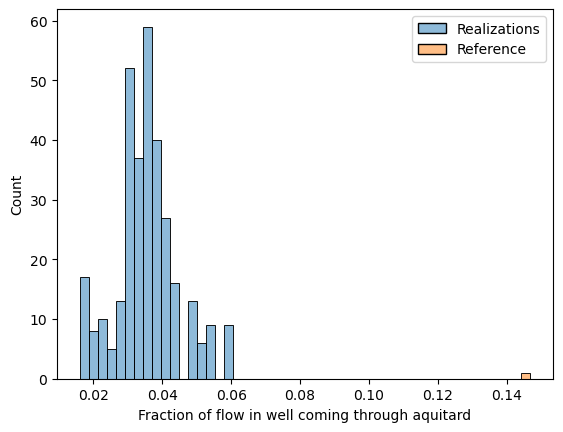

In [ ]:
import seaborn as sns
flowfrac = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\kort_fullrun\flowfrac.csv")
dist = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\kort_fullrun\TT_dist.csv")
fig, ax = plt.subplots()
h = sns.histplot(data = flowfrac, x = 'Flowfrac', hue = 'Realization', ax= ax)
h.get_legend().set_title(None)
ax.set_xlabel('Fraction of flow in well coming through aquitard')

min(flowfrac.Flowfrac)

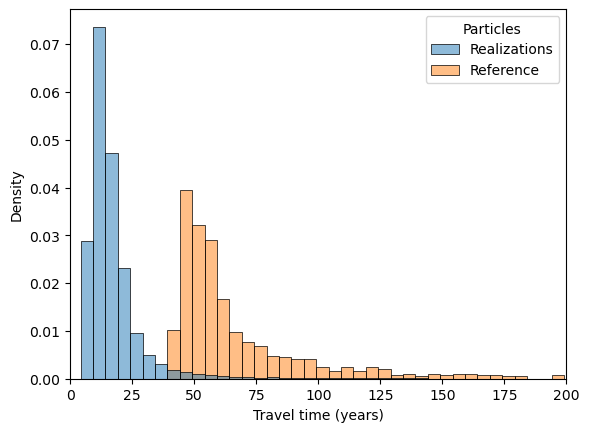

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt 
dist = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\kort_fullrun\TT_dist.csv")
fig, ax = plt.subplots()
h = sns.histplot(data = dist, x = 'dist', hue = 'Realization', stat="density", common_norm=False, ax = ax, binwidth =5,  ec = 'black', linewidth = 0.5)
ax.set_xlim((0,200))
ax.set_xlabel('Travel time (years)')
h.get_legend().set_title('Particles')

Frac = 0.6081871345029239


c:\ProgramData\anaconda3\envs\BW\Lib\site-packages\gstools\covmodel\plot.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<bound method Figure.tight_layout of <Figure size 1000x1000 with 2 Axes>>

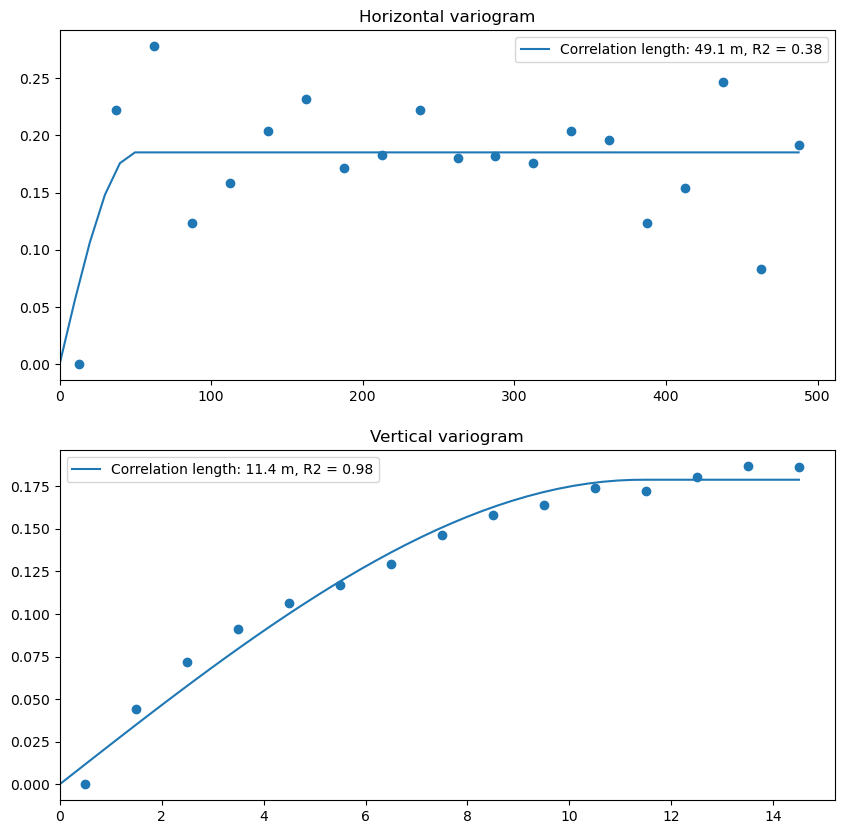

In [208]:
#%%
import gstools as gs
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\kort_fullrun\boreholeindicators.pkl", 'rb') as f:
    boringen = pickle.load(f)
ls = boringen.list
frac = ls.i[ls.i > 0.5].count()/len(ls)
print(f'Frac = {frac}')
#%%
model1 = gs.Spherical(dim = 3)
model3 = gs.Spherical(dim = 3)
main_axes = gs.rotated_main_axes(3,[0,0,0])
axis1, axis2, axis3 = main_axes
bins3 = np.arange(28)
kw = {'bin_no' : 20,
      'max_dist' : 500}

kw_v = {'bin_no' : 15,
      'max_dist' : 15}

bin_center1, dir_vario1 = gs.vario_estimate((ls.x[::28],ls.y[::28]), ls['i (no weight)'].values.reshape(-ls.z.min(),int(len(ls.i)/-ls.z.min())),**kw)#,bins1)
bin_center3, dir_vario3 = gs.vario_estimate((ls.x,ls.y, ls.z), ls['i'], direction = axis3, **kw_v)

para, pcov, r2_1 =  model1.fit_variogram(bin_center1, dir_vario1, nugget =False, return_r2 = True)
para, pcov, r2_3  = model3.fit_variogram(bin_center3, dir_vario3, nugget =False, return_r2 = True)

fig,ax = plt.subplots(2)
fig.set_size_inches(10,10)
ax[0].scatter(bin_center1, dir_vario1)
ax[0].set_xlim(left = 0)
ax[0].set_title('Horizontal variogram')
model1.plot(ax=ax[0], x_max=max(bin_center1), label = f'Correlation length: {model1.len_scale:.1f} m, R2 = {round(r2_1,2)}')

ax[1].scatter(bin_center3, dir_vario3)
ax[1].set_xlim(left = 0)
ax[1].set_title('Vertical variogram')
model3.plot(ax=ax[1], x_max=max(bin_center3), label = f'Correlation length: {model3.len_scale:.1f} m, R2 = {round(r2_3,2)}')
fig.tight_layout

# %%


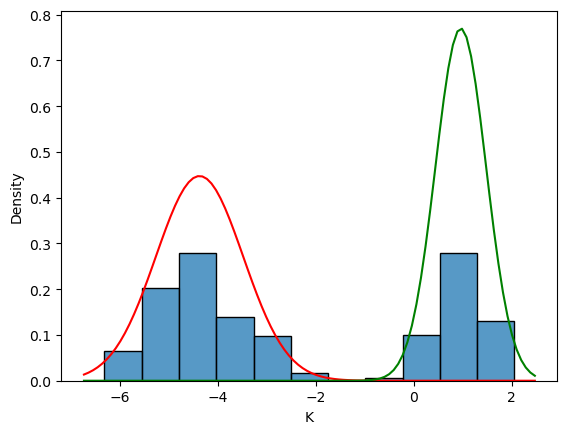

In [217]:
import scipy
boringen.Kweighted
fig, ax = plt.subplots()
sns.histplot(boringen.Kweighted, x = 'K', ax = ax, stat = 'density')
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,100)

boringen.mu1, boringen.std1 = scipy.stats.norm.fit(boringen.Kweighted[boringen.Kweighted['Lithoclass'].isin(boringen.group)]['K'])
y_pdf1 = scipy.stats.norm.pdf(x_pdf, boringen.mu1, boringen.std1)
ax.plot(x_pdf, y_pdf1, c = 'r')
boringen.mu2, boringen.std2 = scipy.stats.norm.fit(boringen.Kweighted[boringen.Kweighted['Lithoclass'].isin(boringen.group) == False]['K'])
y_pdf2 = scipy.stats.norm.pdf(x_pdf, boringen.mu2, boringen.std2)
ax.plot(x_pdf, y_pdf2, c = 'green')